In [22]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

import scanpy as sc

from sciso.plot import *

Set plot style

In [2]:
set_nature_style()

## Set paths

In [3]:
# Input
data_dir = Path(r"/media/buglakova/embl_data/data/lipid_isotope/20220322_AB_DKFZHypoxia") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "hypoxia_adata_concat_filtered.h5ad"
adata_am_path =anndata_dir / "hypoxia_adata_am_concat.h5ad"

# Output
plots_path = data_dir / "assign_conditions_plots"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

## Load anndata

In [4]:
adata = sc.read_h5ad(adata_path)

In [26]:
print("All ions:")
print(adata.var.unlabeled_annotation_id.unique())

All ions:
['C18H36O2-H', 'C18H34O2-H', 'C16H32O2-H', 'C16H30O2-H', 'C14H28O2-H']
Categories (5, object): ['C14H28O2-H', 'C16H30O2-H', 'C16H32O2-H', 'C18H34O2-H', 'C18H36O2-H']


## Plot separate measurements

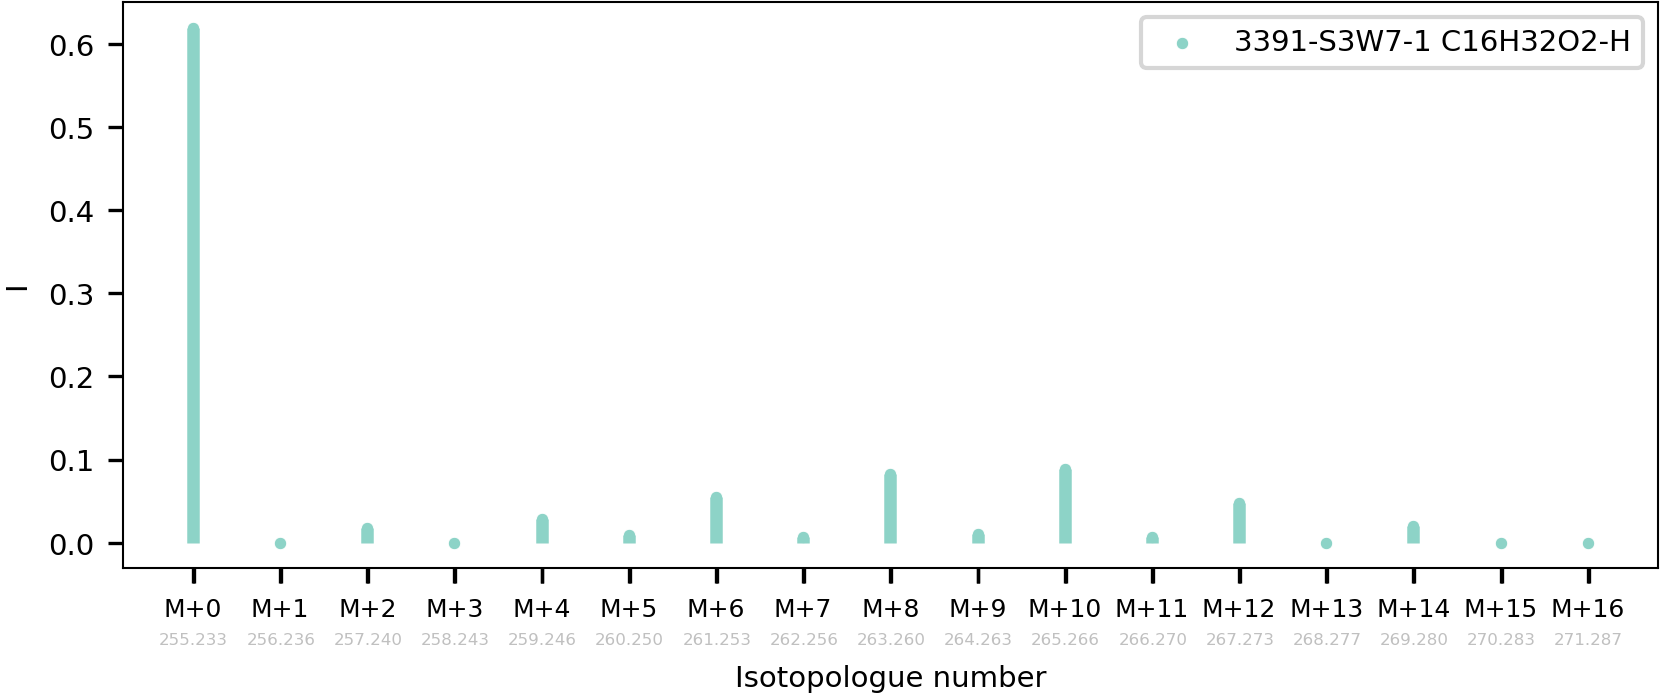

In [7]:
cell_idx = "3391-S3W7-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)

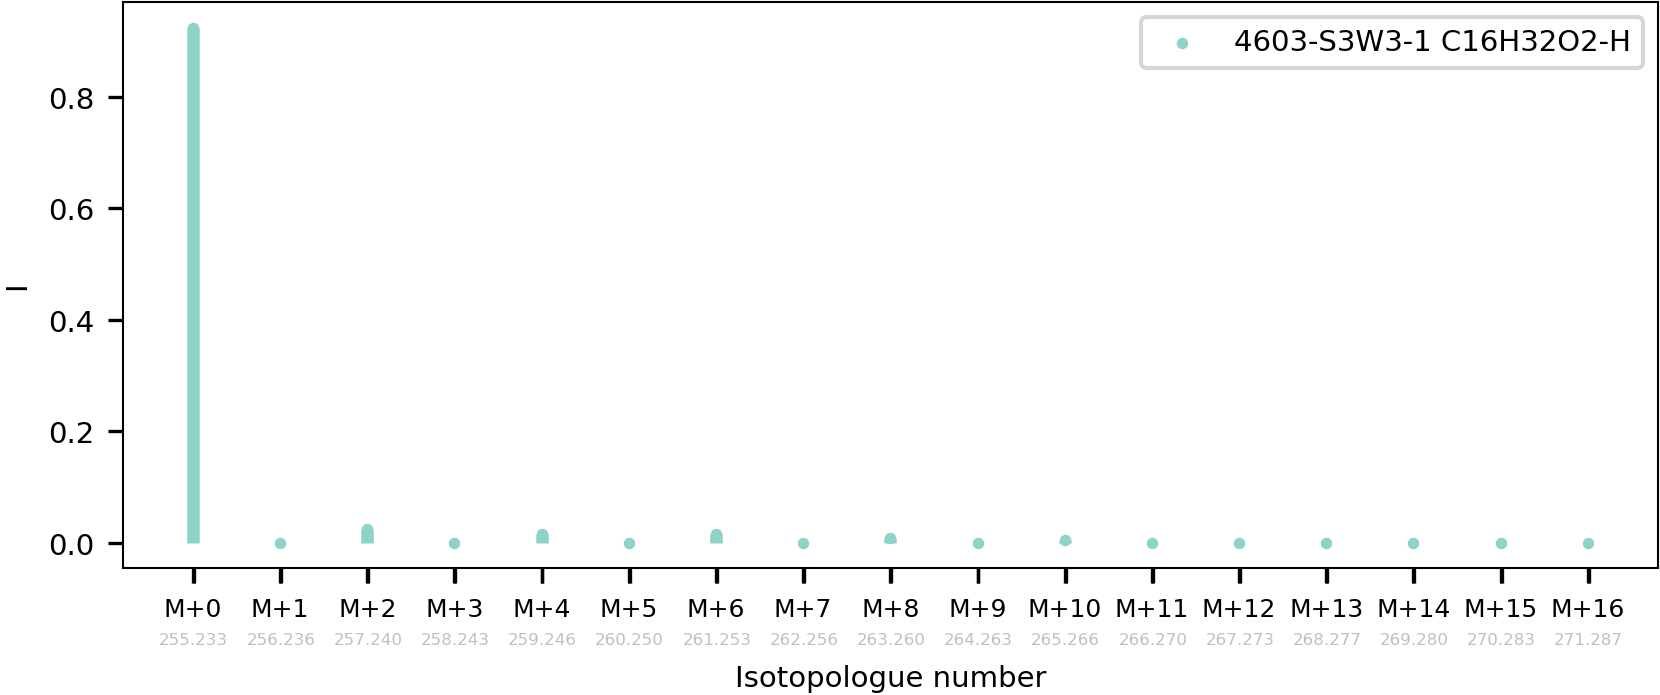

In [8]:
cell_idx = "4603-S3W3-1"
ion = 'C16H32O2-H'
layer = "corr_norm"

fig, ax = plt.subplots(1, 1, figsize=(x_width * 2, y_width))
ax = plot_iso_distribution(adata, ion, cell_idx, layer, ax=ax)

In [9]:
adata[adata.obs.batch == "S3W3"].obs.head()

,center_x,center_y,cell_area,cell_sampling_area,cell_sampling_ratio,cell_nearest_am_distance,cell_nearest_cell_distance,centroid-0,centroid-1,bbox-0,...,growthConditions,GFP_ground_truth,ionisationSource,maldiMatrix,analyzer,resPower400,polarity,uploadDateTime,mixture,log_cell_area
cell_id,,,,,,,,,,,,,,,,,,,,,
4603-S3W3-1,1384.918817,286.284843,2131,1347.0,0.632098,4.600735,41.231724,286.284843,1384.918817,230,...,Labeled,1,AP-SMALDI5,"1,5-diaminonaphthalene (DAN)",Orbitrap,98995,negative,2022-04-11 10:26:29,0,3.328583
4606-S3W3-1,436.155705,284.987634,1779,1161.0,0.652614,3.425278,66.098990,284.987634,436.155705,247,...,Labeled,1,AP-SMALDI5,"1,5-diaminonaphthalene (DAN)",Orbitrap,98995,negative,2022-04-11 10:26:29,0,3.250176
4607-S3W3-1,1176.297194,286.889031,1568,1117.0,0.712372,8.434653,68.367509,286.889031,1176.297194,250,...,Labeled,1,AP-SMALDI5,"1,5-diaminonaphthalene (DAN)",Orbitrap,98995,negative,2022-04-11 10:26:29,0,3.195346
4609-S3W3-1,1087.801686,290.200089,2254,1687.0,0.748447,3.460497,56.542936,290.200089,1087.801686,262,...,Labeled,1,AP-SMALDI5,"1,5-diaminonaphthalene (DAN)",Orbitrap,98995,negative,2022-04-11 10:26:29,0,3.352954
4610-S3W3-1,1490.549952,293.054801,2062,1479.0,0.717265,3.991350,44.873661,293.054801,1490.549952,262,...,Labeled,1,AP-SMALDI5,"1,5-diaminonaphthalene (DAN)",Orbitrap,98995,negative,2022-04-11 10:26:29,0,3.314289


## Comparison with bulk

No bulk data yet though

In [10]:
adata.obs.condition.unique()

['Normoxia', 'Hypoxia', 'Hypoxia + Normoxia']
Categories (3, object): ['Hypoxia', 'Hypoxia + Normoxia', 'Normoxia']

In [11]:
adata.obs.growthConditions.unique()

['Unlabeled', 'Labeled']
Categories (2, object): ['Labeled', 'Unlabeled']

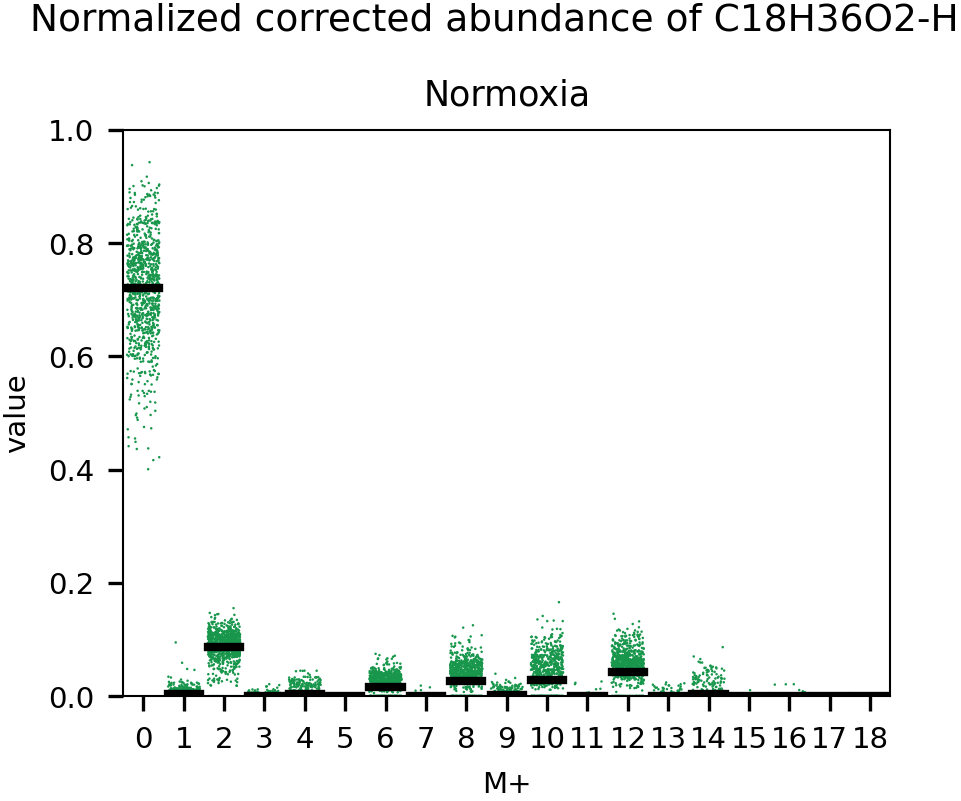

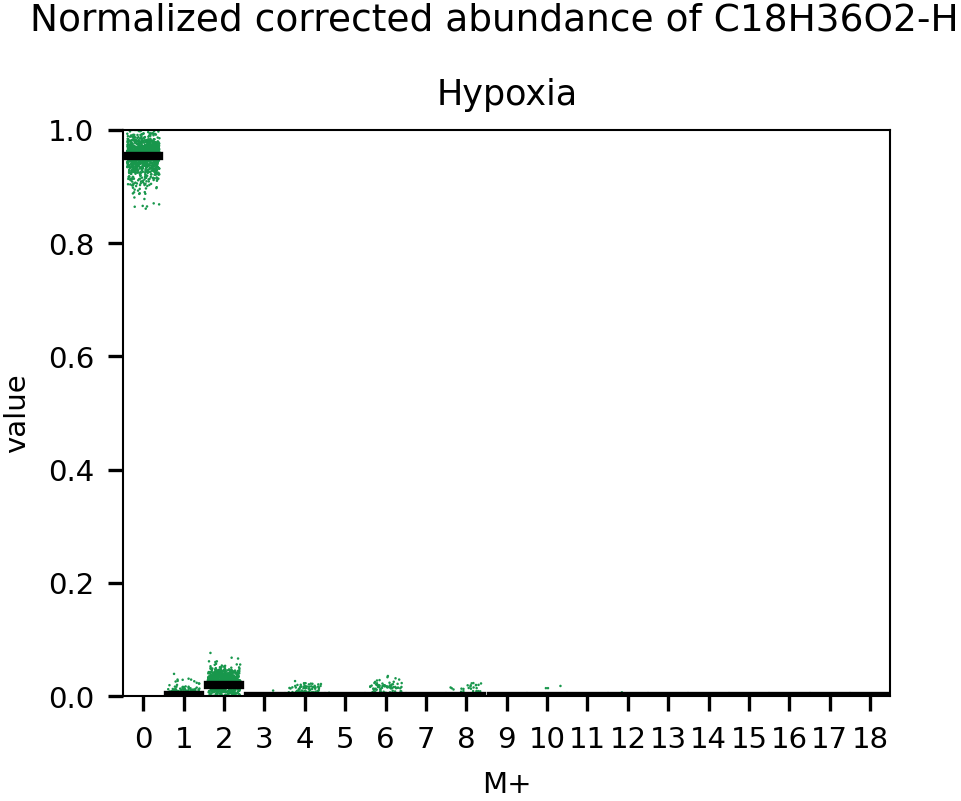

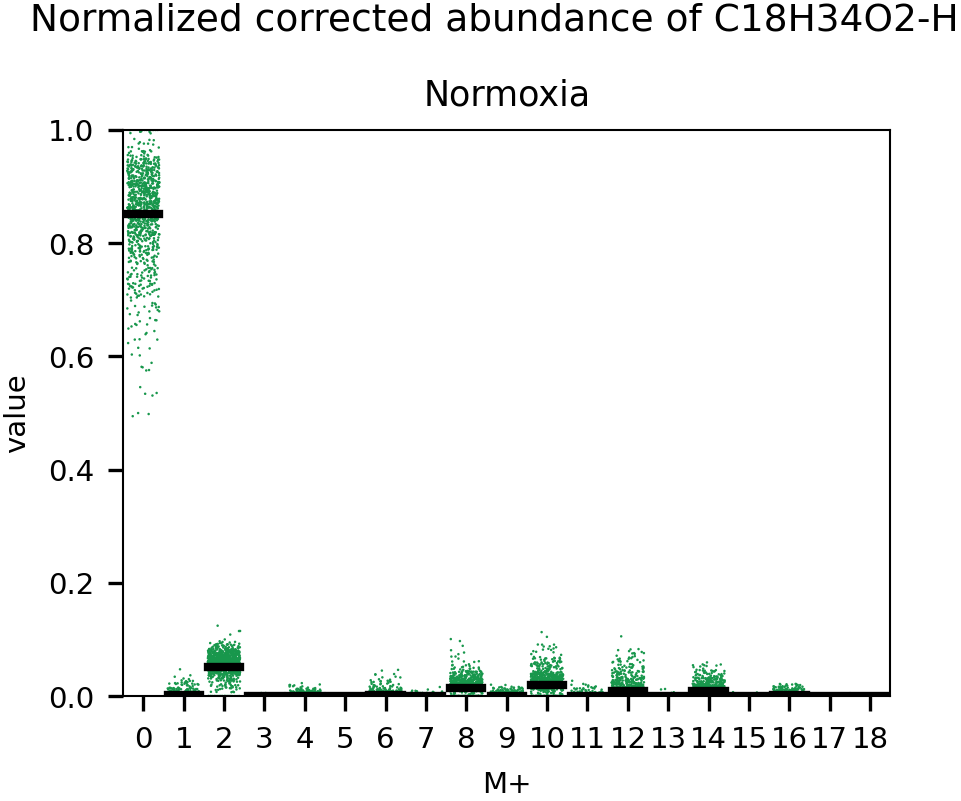

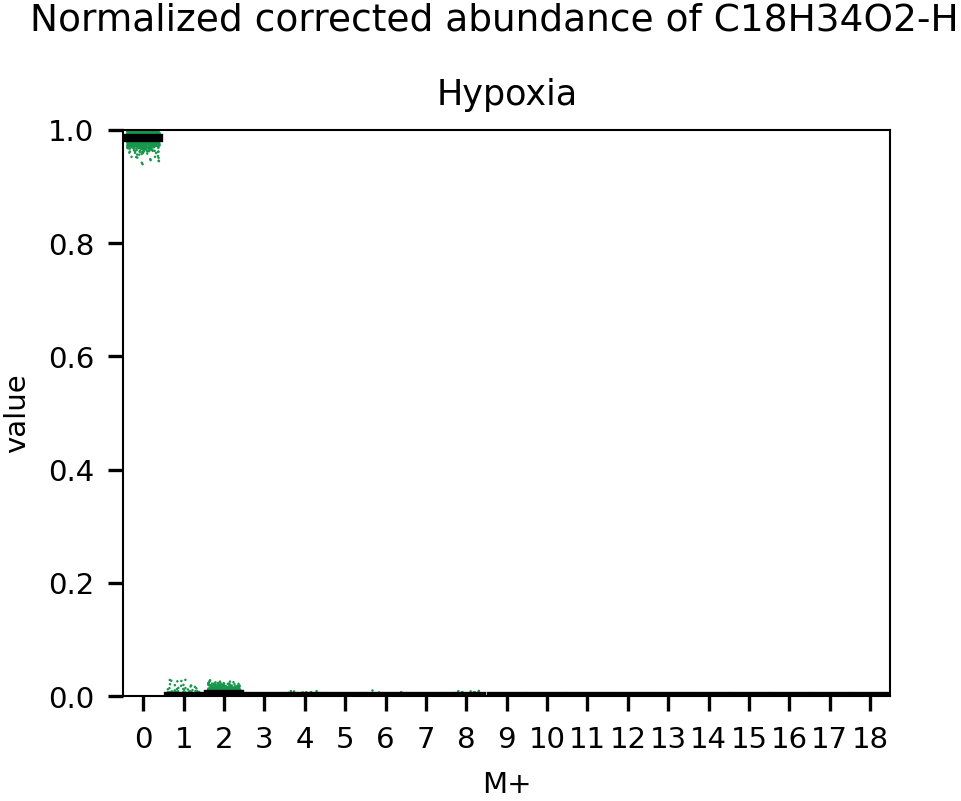

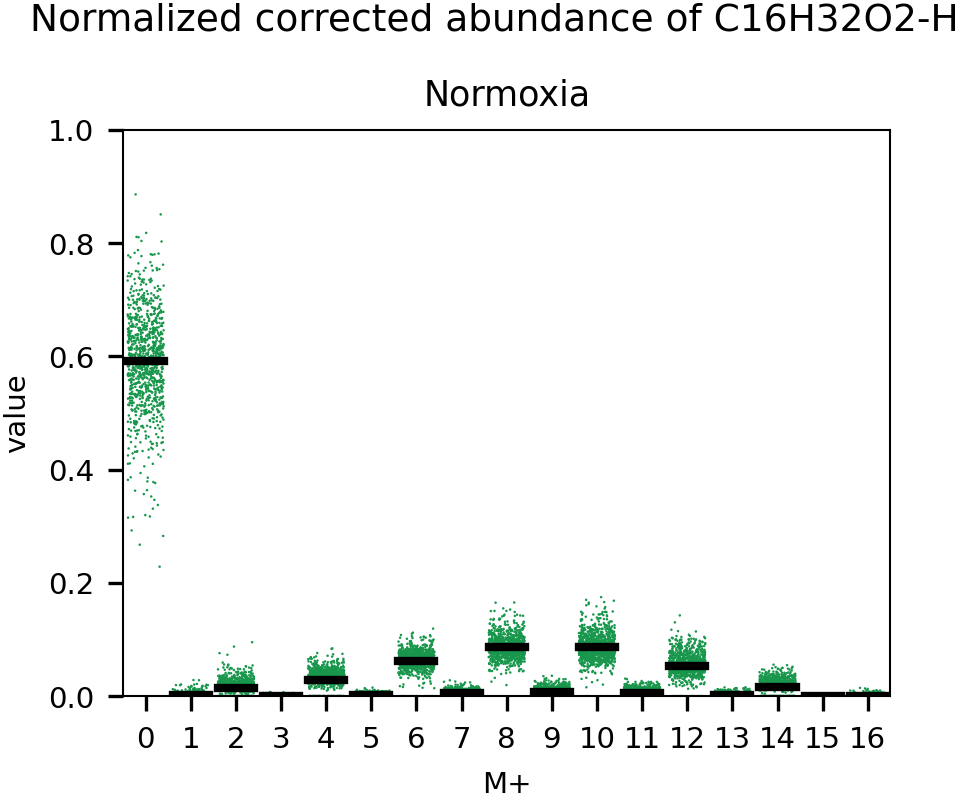

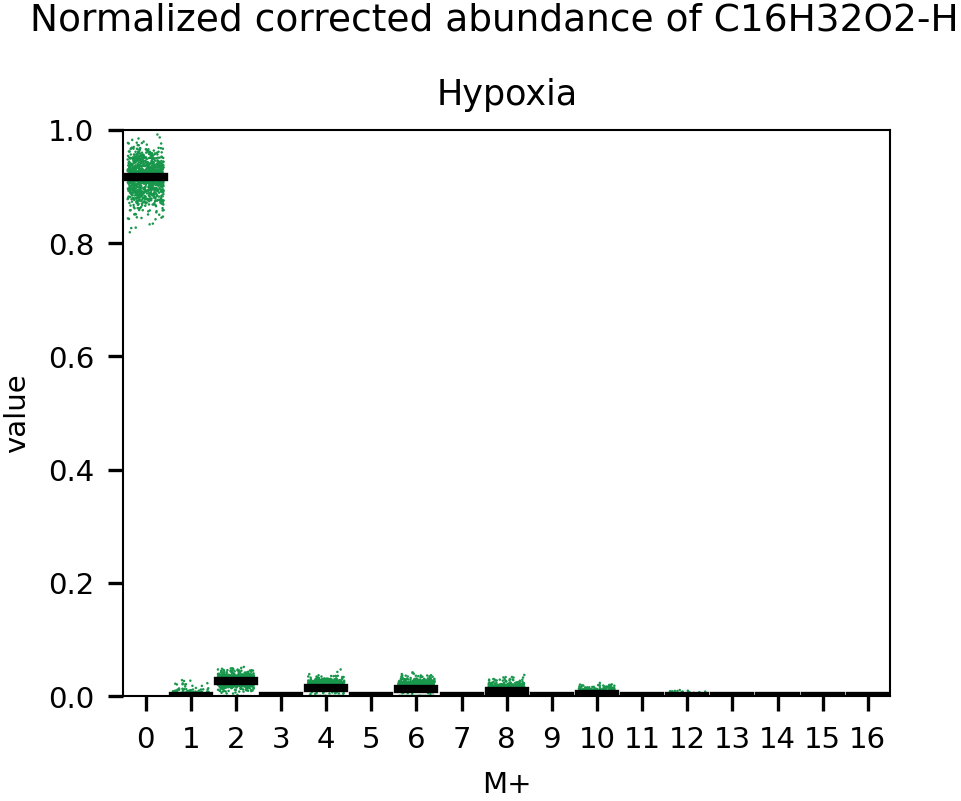

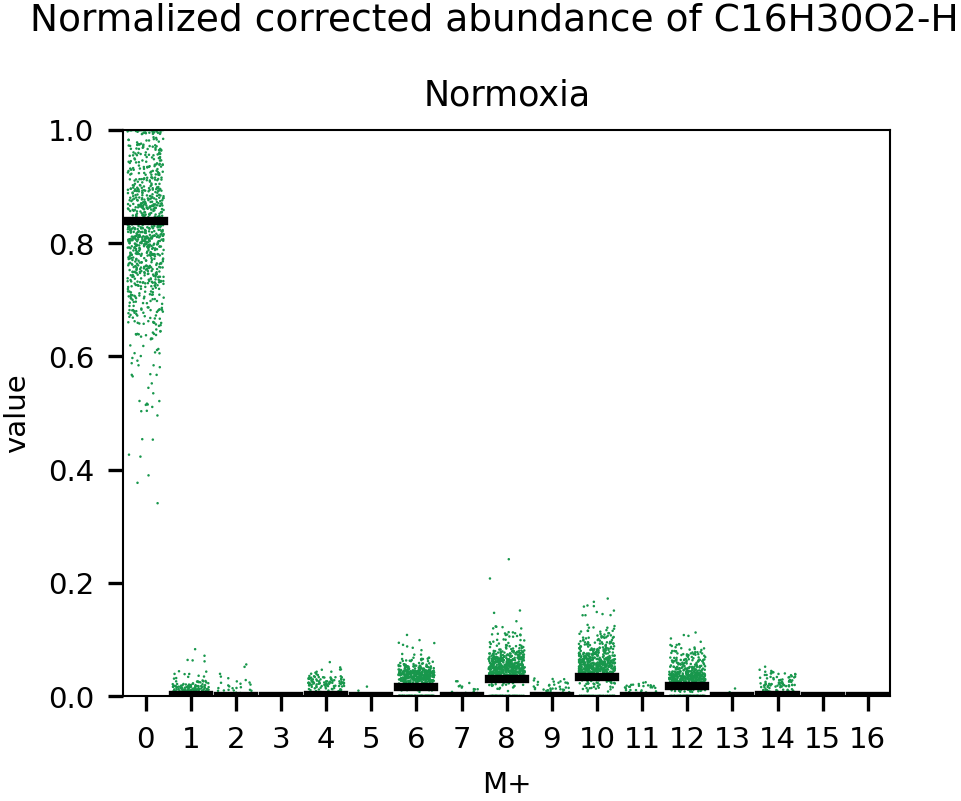

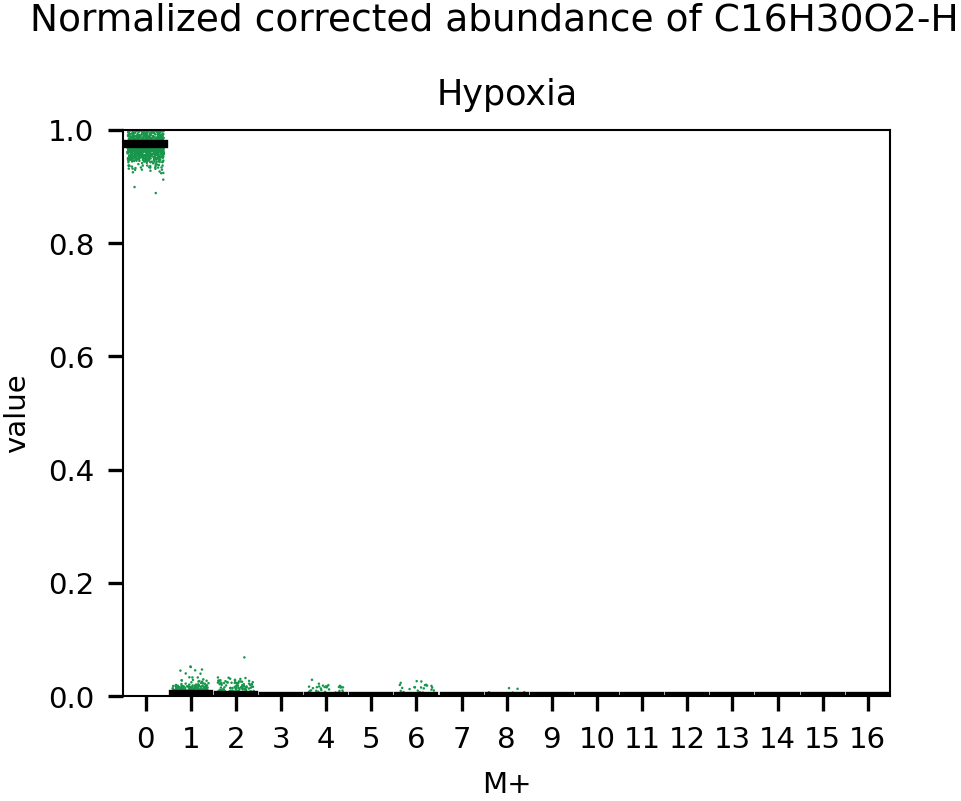

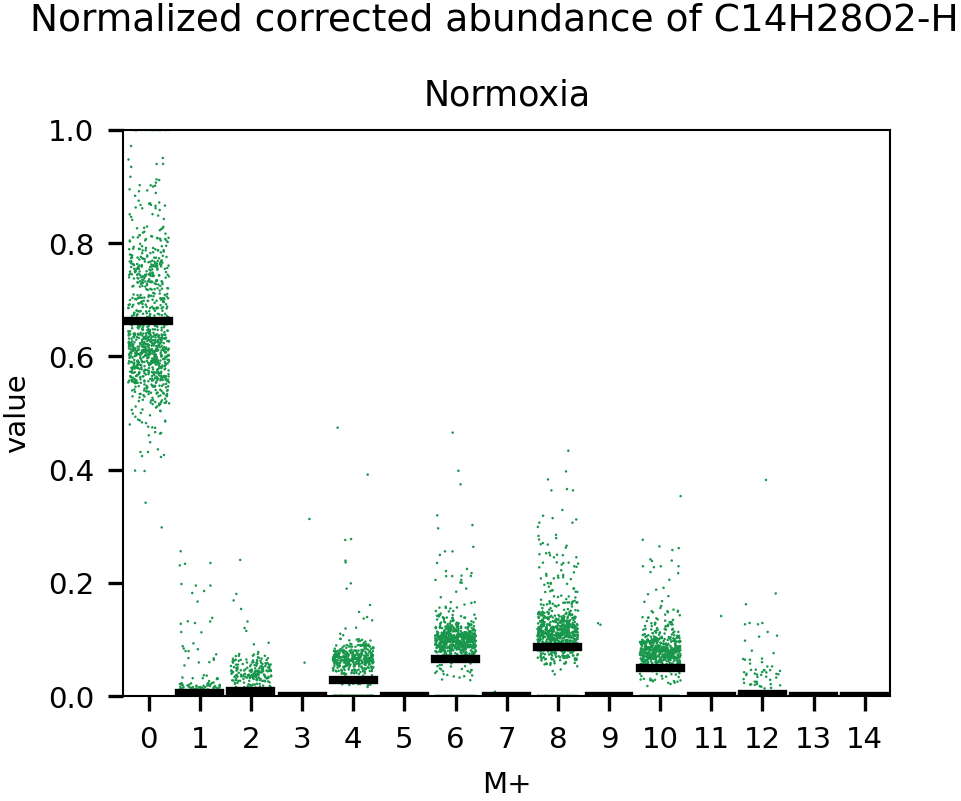

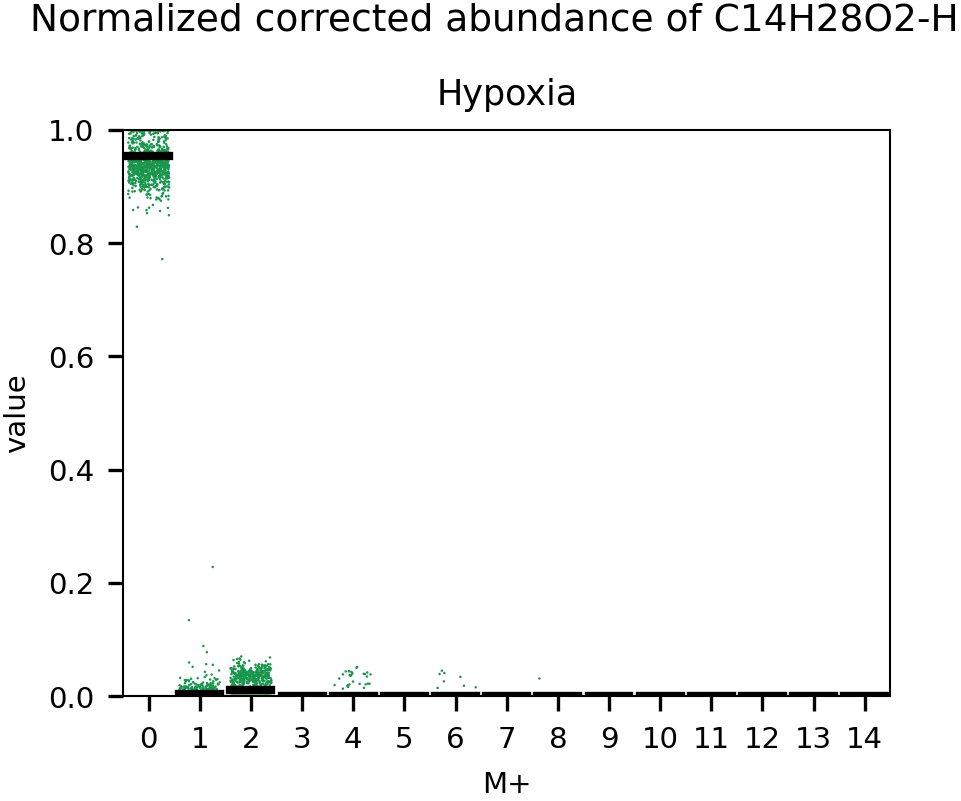

In [12]:
for idx, ion in adata.var[adata.var["M+"] == 0].iterrows():
    for cond in ["Normoxia", "Hypoxia"]:
        adata_cond = adata[(adata.obs.condition == cond) & (adata.obs.growthConditions == "Labeled")]
        ion_stripplot_bulk(adata_cond, ion.unlabeled_annotation_id)
        plt.suptitle("Normalized corrected abundance of %s"%ion.unlabeled_annotation_id, y=1.05)
        plt.title(cond)
        plt.savefig(plots_path / ("bulk_comparison_%s_%s_labeled.png"%(cond, ion.unlabeled_annotation_id)))
        plt.savefig(plots_path / ("bulk_comparison_%s_%s_labeled.svg"%(cond, ion.unlabeled_annotation_id)))
        plt.show()

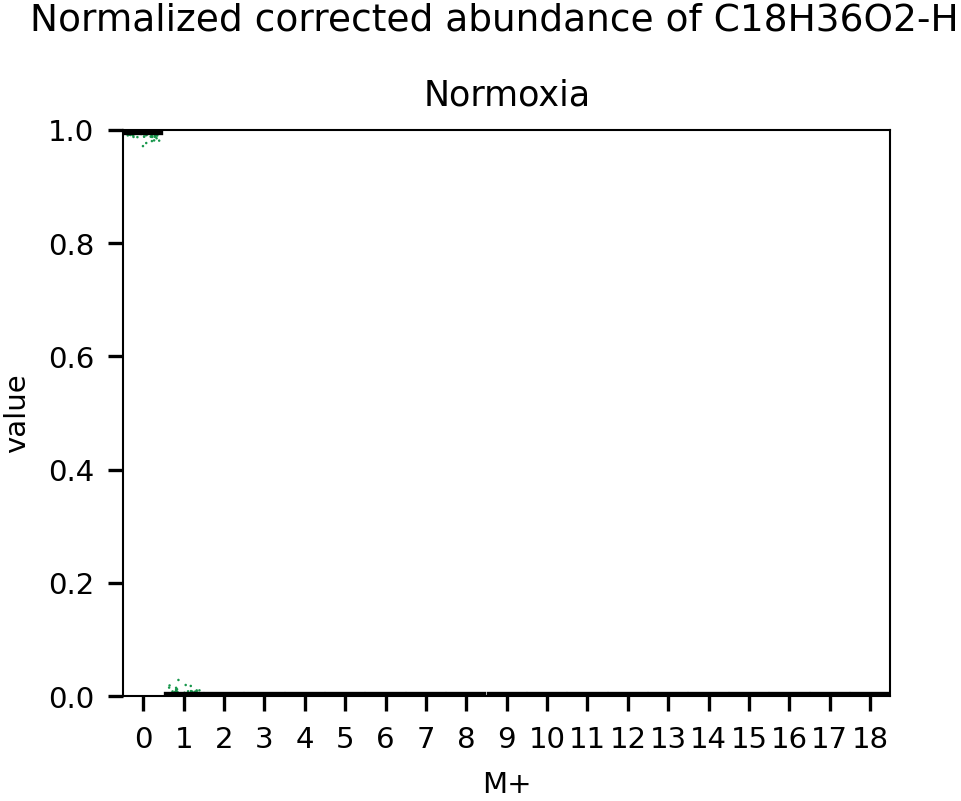

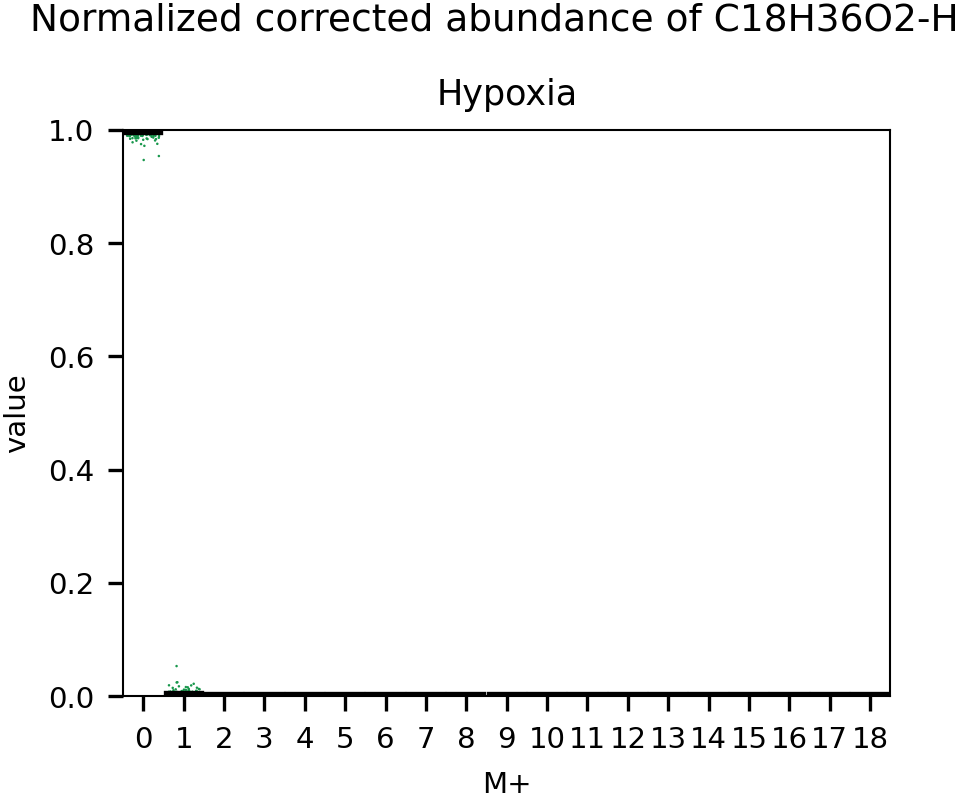

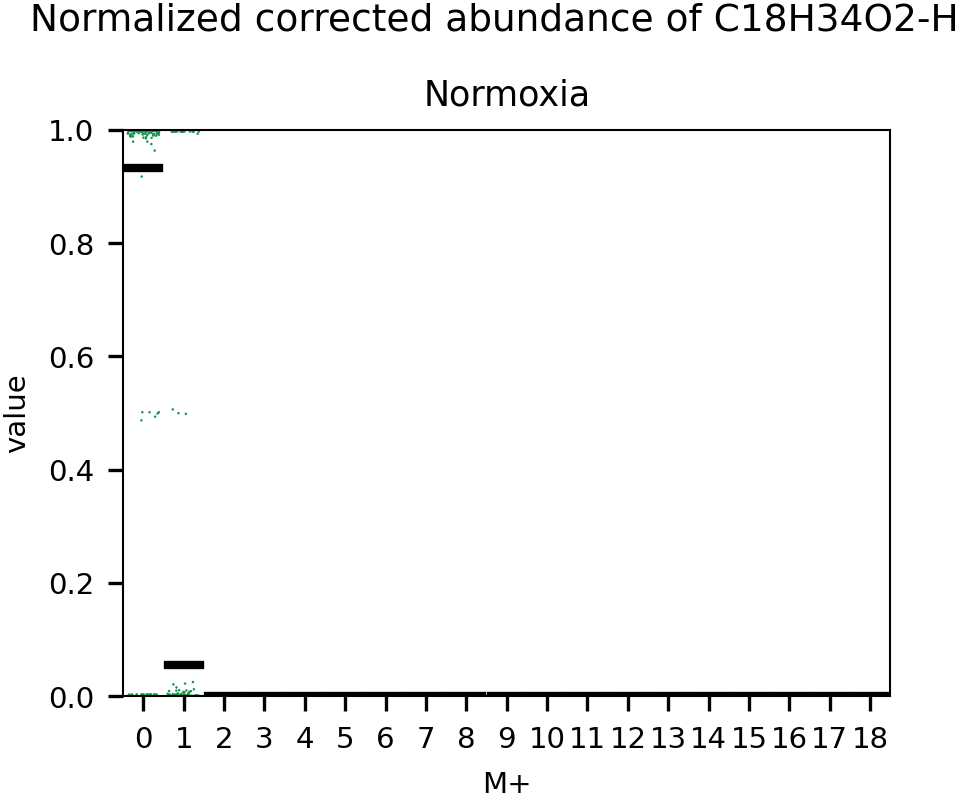

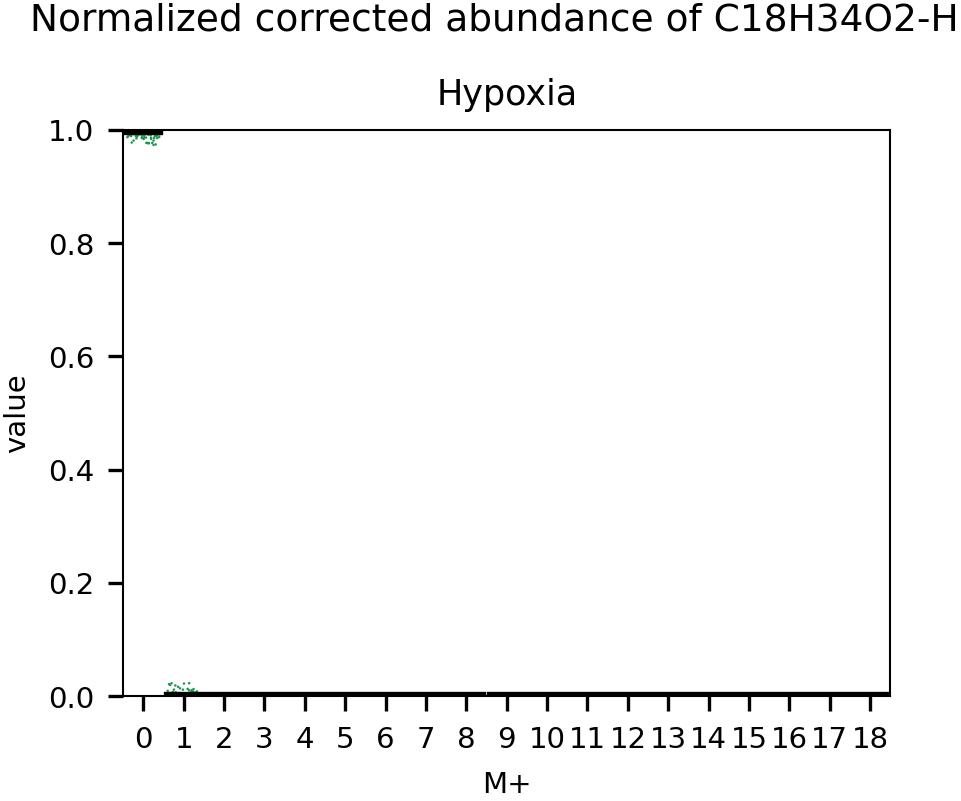

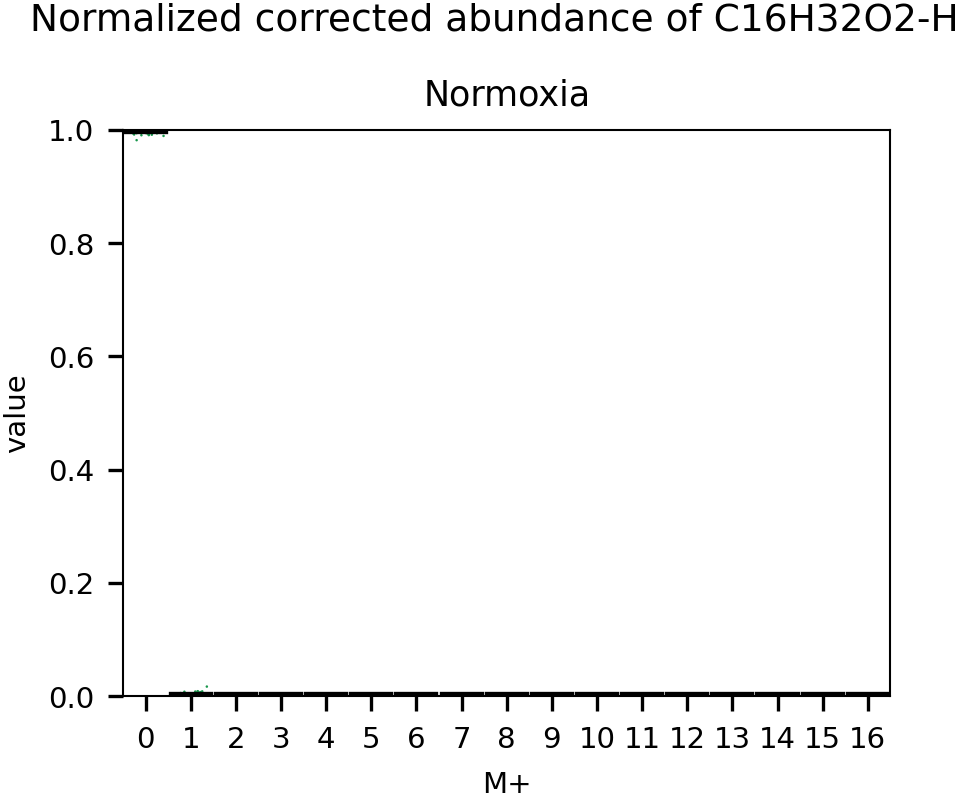

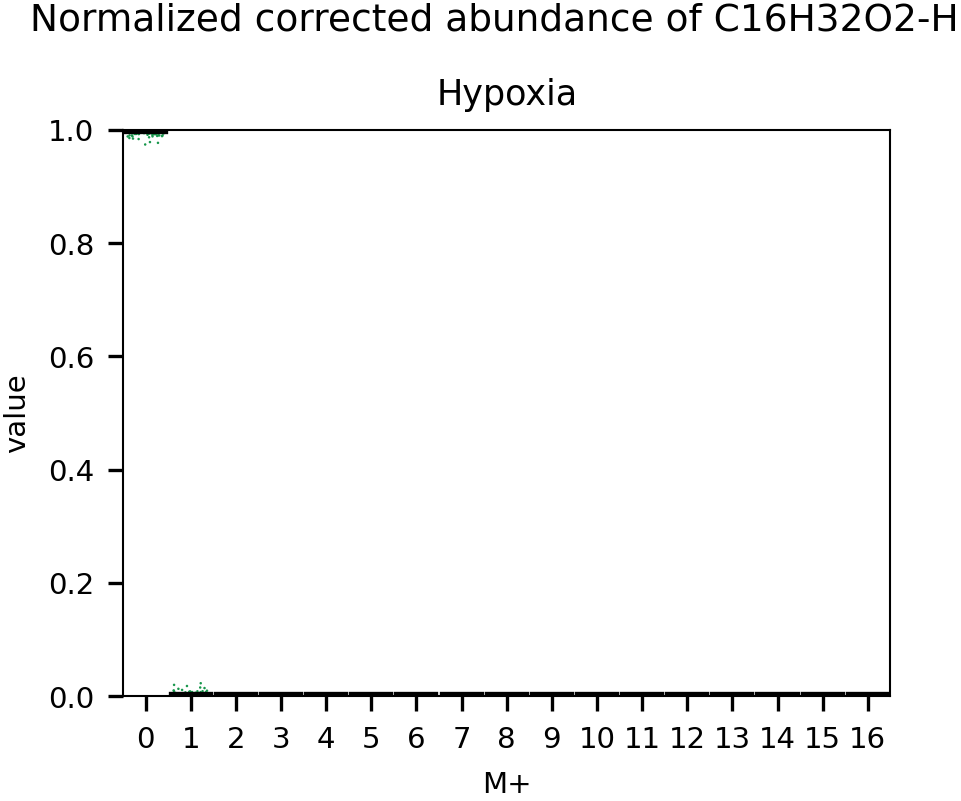

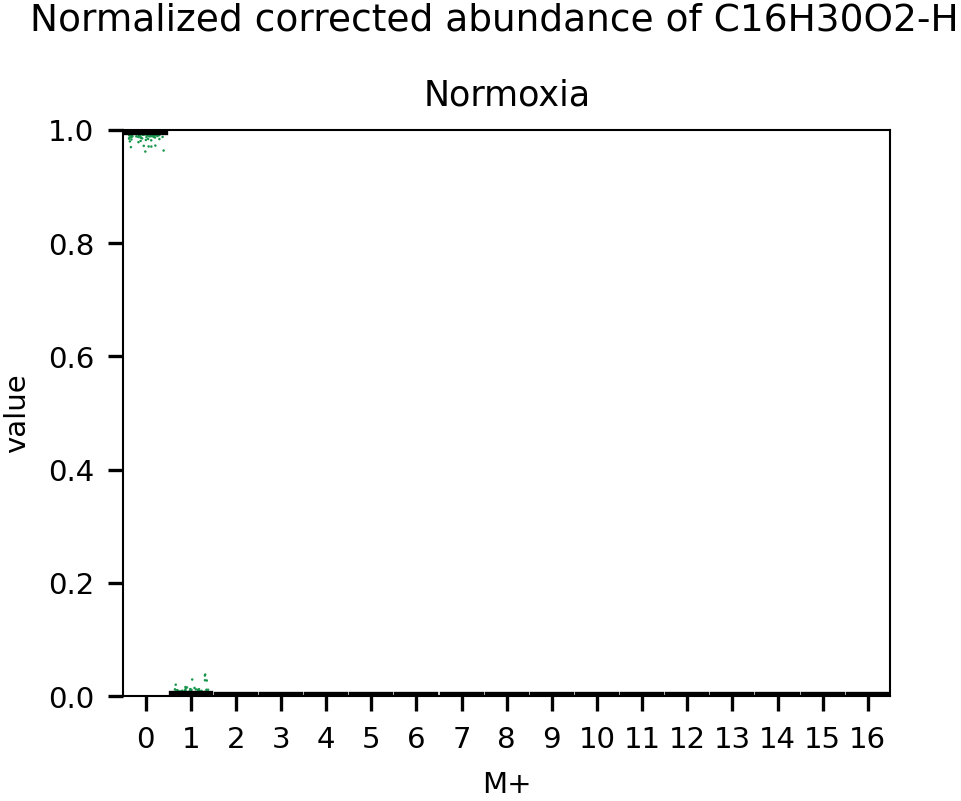

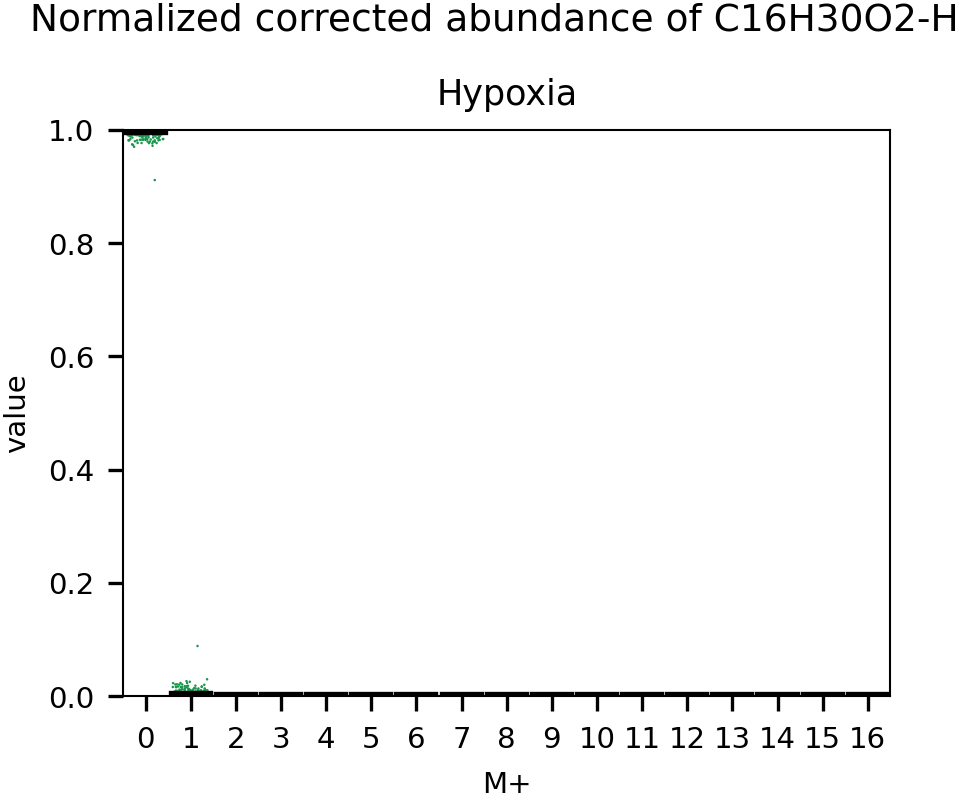

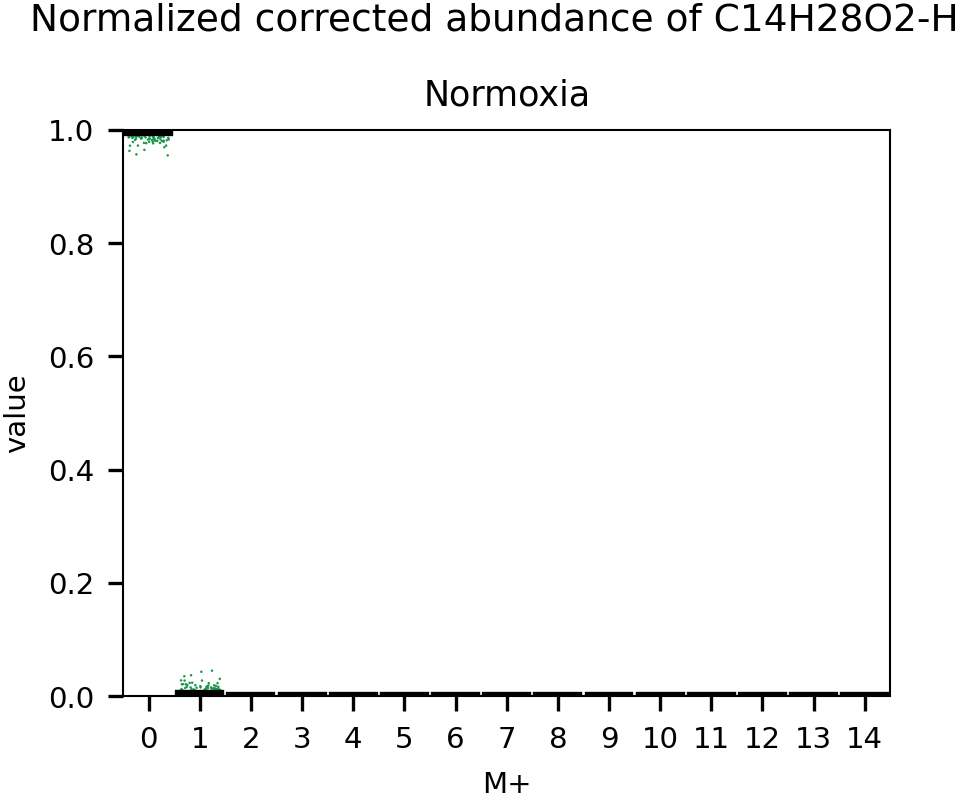

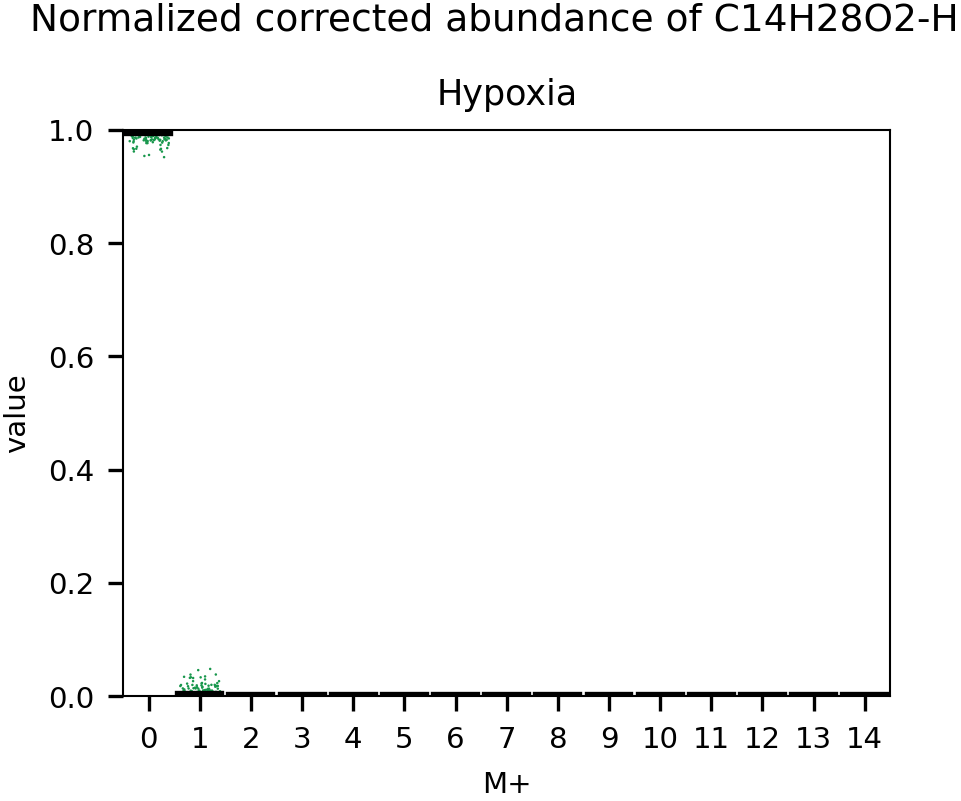

In [13]:
for idx, ion in adata.var[adata.var["M+"] == 0].iterrows():
    for cond in ["Normoxia", "Hypoxia"]:
        adata_cond = adata[(adata.obs.condition == cond) & (adata.obs.growthConditions == "Unlabeled")]
        ion_stripplot_bulk(adata_cond, ion.unlabeled_annotation_id)
        plt.suptitle("Normalized corrected abundance of %s"%ion.unlabeled_annotation_id, y=1.05)
        plt.title(cond)
        plt.savefig(plots_path / ("bulk_comparison_%s_%s_unlabeled.png"%(cond, ion.unlabeled_annotation_id)))
        plt.savefig(plots_path / ("bulk_comparison_%s_%s_unlabeled.svg"%(cond, ion.unlabeled_annotation_id)))
        plt.show()

# Assign conditions based on fluorescence

In [29]:
def normalize(x):
    return (x - x.min())

def gfp_log(x):
    x_norm = normalize(x) 
    return np.log10(x_norm + 1)

# def gfp_log_per_batch(adata):

In [44]:
for slide in adata.obs.slide.unique():
    print("Slide: ", slide)
    slide_idx = adata[adata.obs.slide == slide, :].obs.index
    adata.obs.loc[slide_idx, "log_gfp"] = gfp_log(np.array(adata.obs.loc[slide_idx, "max_intensity-GFP_PBS"]))
    # adata.obs["median_intensity-GFP"]

Slide:  2
Slide:  3


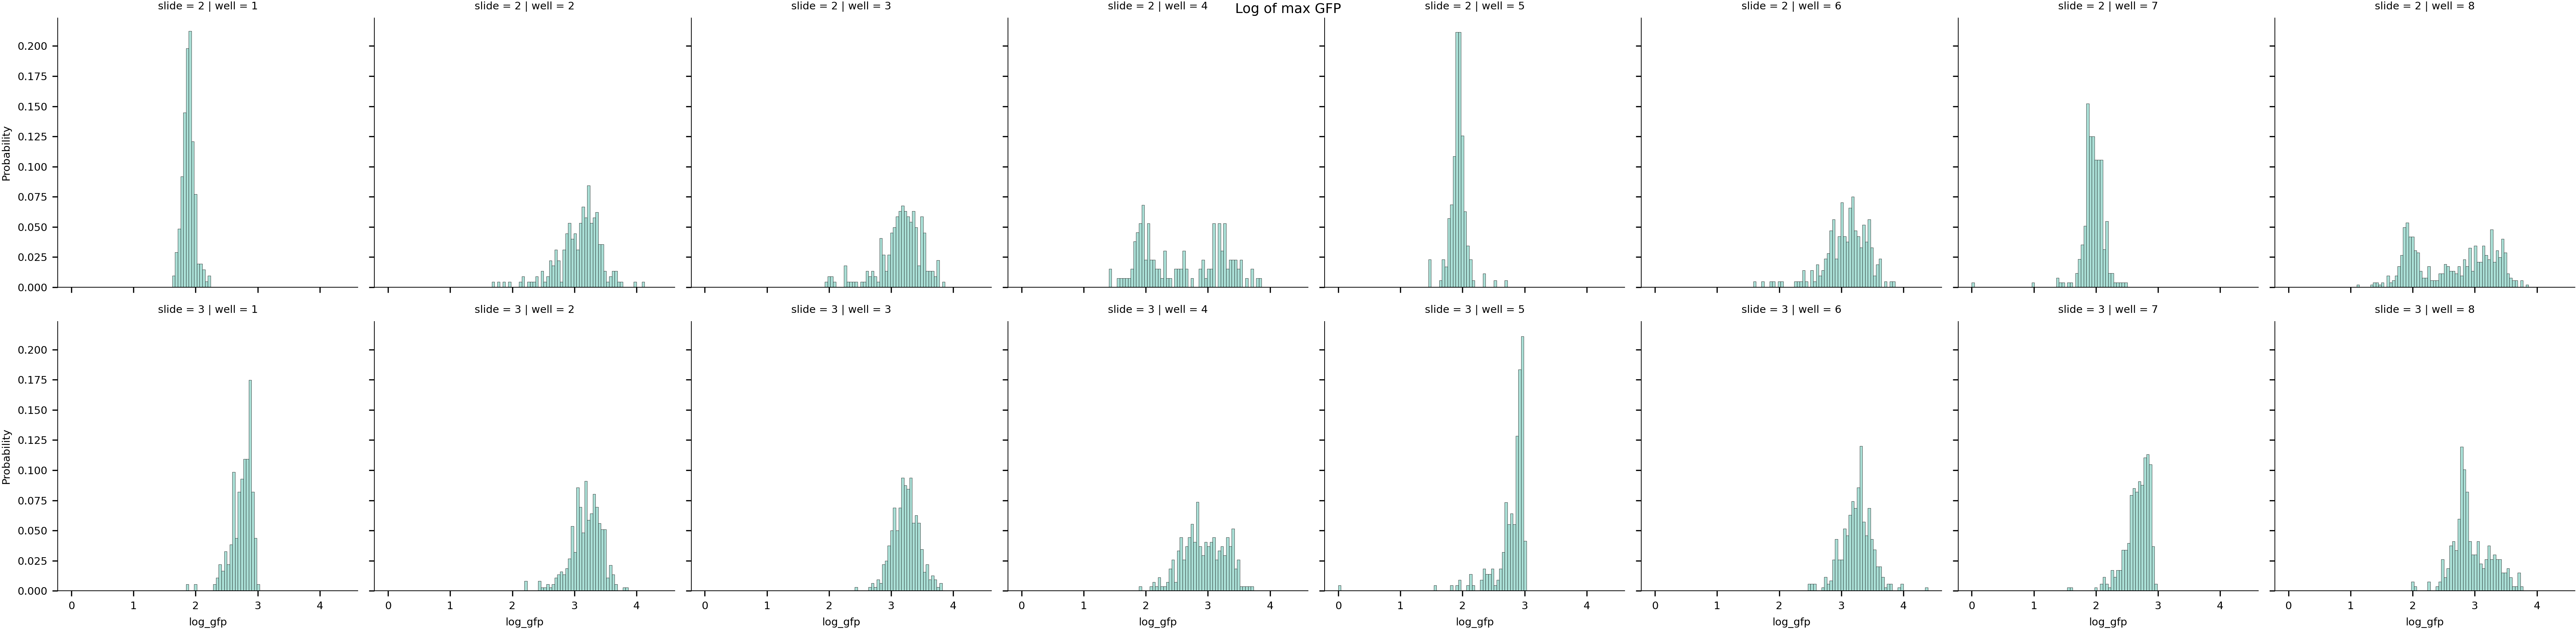

In [45]:
g = sns.FacetGrid(adata.obs, col="well",  row="slide")
g.map_dataframe(sns.histplot, x="log_gfp", stat="probability", binrange=[adata.obs.log_gfp.min(), adata.obs.log_gfp.max()], bins=100)
g.fig.suptitle("Log of max GFP")
plt.savefig(plots_path / f"hist_per_slide_log_max_gfp.png")
plt.savefig(plots_path / f"hist_per_slide_log_max_gfp.svg")
plt.show()

In [51]:
gfp_thresholds = {s: np.quantile(adata[(adata.obs.slide == s) & (adata.obs["GFP_ground_truth"] == 0), :].obs["log_gfp"], 0.95) for s in adata.obs.slide.unique()}
adata.obs["gfp_class"] = [gfp_i > gfp_thresholds[s] for gfp_i, s in zip(adata.obs.log_gfp, adata.obs.slide)]

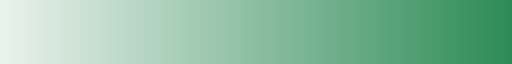

In [52]:
sns.light_palette("seagreen", as_cmap=True)

In [53]:
adata.obs["GFP state"] = adata.obs["GFP_ground_truth"].replace({0: "negative",
                                                           1: "positive",
                                                           2: "mixture"})
adata.obs["assigned GFP class"] = adata.obs["gfp_class"].replace({False: "low",
                                                           True: "high"})

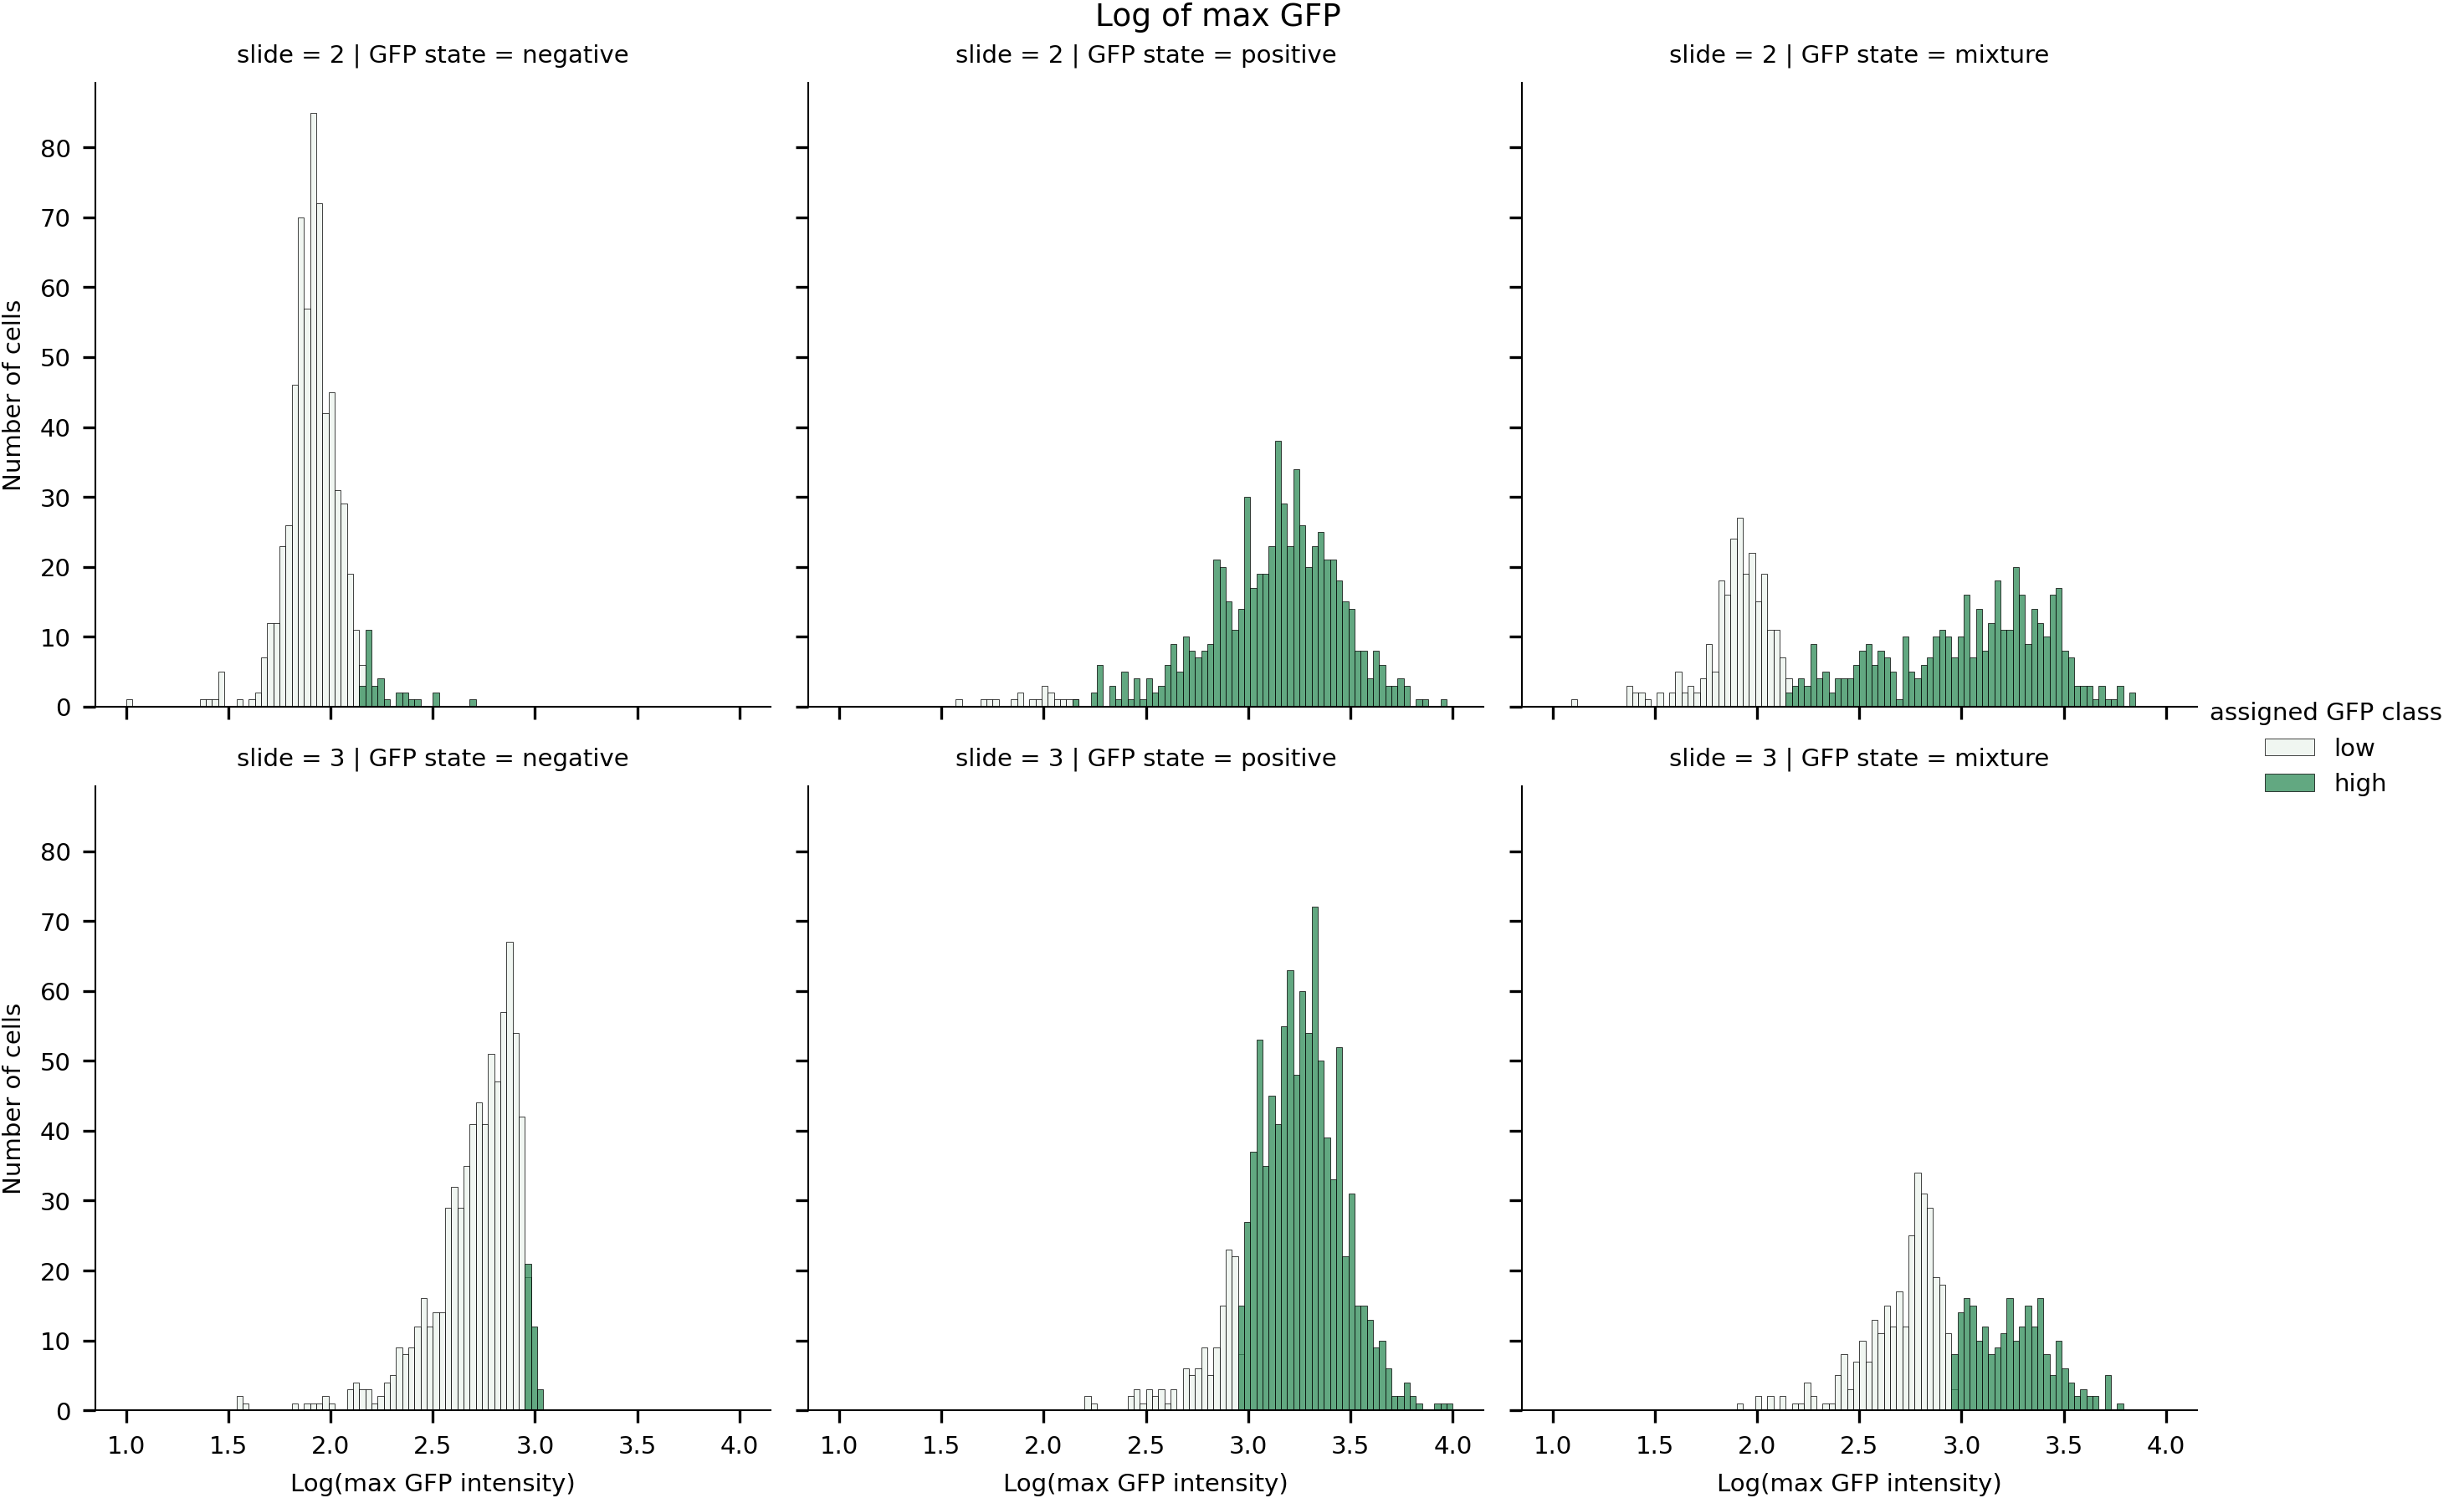

In [54]:
g = sns.FacetGrid(adata.obs, col="GFP state",
                  row="slide",
                  col_order=["negative", "positive", "mixture"],
                  hue="assigned GFP class",
                  palette=sns.light_palette("seagreen", 2),
                  hue_order=["low", "high"])
g.map_dataframe(sns.histplot, x="log_gfp", binrange=[1, 4], bins=100)
g.fig.suptitle("Log of max GFP", y=1.01)
g.add_legend()
g.set_axis_labels("Log(max GFP intensity)", "Number of cells")
plt.savefig(plots_path / f"hist_per_gfp_gt_log_max_gfp.png")
plt.savefig(plots_path / f"hist_per_gfp_gt_log_max_gfp.svg")
plt.show()

## Confusion matrix and classification error based on fluorescence 

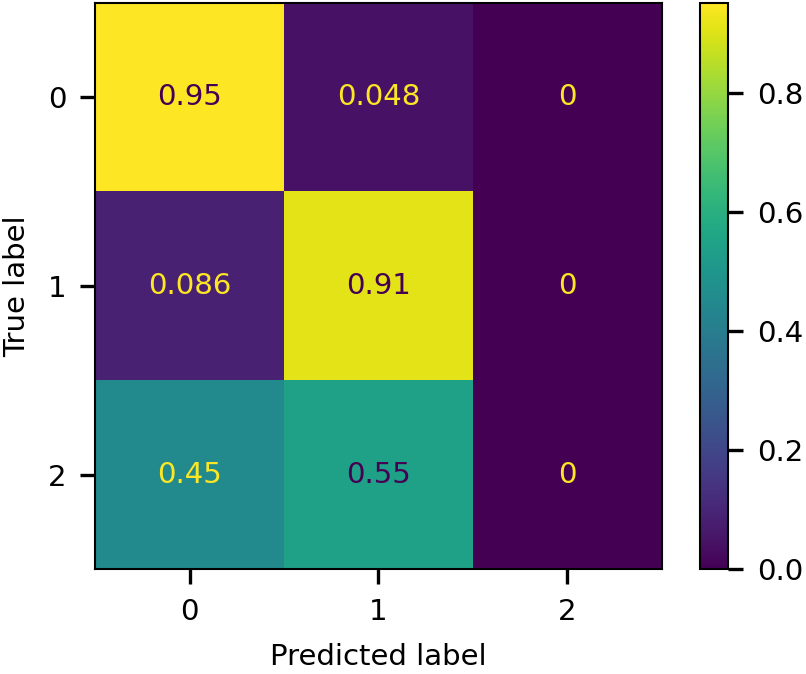

In [55]:
ConfusionMatrixDisplay.from_predictions(y_true=adata.obs["GFP_ground_truth"], y_pred=adata.obs["gfp_class"], normalize="true")
plt.savefig(plots_path / "fluorescence_confusion_matrix.png")
plt.savefig(plots_path / "fluorescence_confusion_matrix.svg")


## Save resulting Anndata

In [43]:
output_file = anndata_dir / "hypoxia_adata_concat_gfp_cond.h5ad"
adata.write(output_file.with_suffix(".h5ad"))